## WE11- Autoencoder

### Hema Sai Ari(U59528014)

In this example, we will demonstrate how a model that has been pretrained can be continued to train with new data. This is useful when you have a model that has been trained on a large dataset, and you want to fine-tune it to a new dataset. 
Lets train the model with 5 'h' letter images

In [1]:
import numpy as np

### Load our pretrained model

Lets load the new autoencoder we have created an trained in the 'We11- New Autoencoder' notebook

In [2]:
from tensorflow import keras

pretrained_model = keras.models.load_model('initially_trained_new_autoencoder.h5')


### Load our new images and test the autoencoder on this new symbol

In [3]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

In [4]:
# load 5 sample images

images = []
for i in range(5):
    img = tf.keras.utils.load_img(f'hem{i+1}.png', target_size=(28, 28), color_mode="grayscale")
    images.append(img)

### predict the 5 images from the sample

In [5]:

input_arrs = []
for img in images:
    input_arr = tf.keras.utils.img_to_array(img)
    input_arr = input_arr/255  # normalize between 0 and 1
    input_arr = input_arr.reshape(784)
    input_arrs.append(input_arr)

input_arrs = np.array(input_arrs)  # Convert images to a batch of images

predictions = pretrained_model.predict(input_arrs)
print(predictions.shape)

1/1 [==============================] - 0s 379ms/step
(5, 784)


#### display the images and their reconstructions side by side

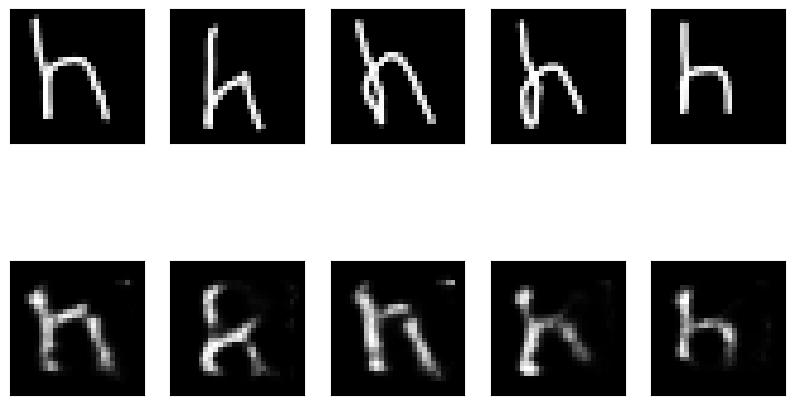

In [6]:

plt.figure(figsize=(10, 6))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap="gray")
    
    plt.subplot(2, 5, i+6)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(predictions[i].reshape(28, 28), cmap="gray")

plt.show()

As we can, this autoencoder doesn't do a good job with this new symbols.

### Try to continue training the model on the original 10 digits and with the new symbol mixed in   

Let's try to retrain the original model with a mix of the new symbols and the original 10. Our goal it so avoid retraining with the entire original test test, and instead only use a small subset of the original test set.

In [7]:
from tensorflow.keras.datasets import mnist

# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [8]:
# Flatten the images for an autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [9]:
# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

### Create bad images and merge with training data

Bad images is nothing but the oversampled array of all the 5 symbols

In [10]:

input_arrs = np.array(input_arrs)
bad_images = np.repeat(input_arrs, 15, axis=0)#oversampling the data
new_image_set = np.vstack((train_images[:500], bad_images))#ony 500 subset from the main dataset
np.random.shuffle(new_image_set)

In [11]:
new_images_train = new_image_set[int(len(new_image_set)*.8):]
new_images_test = new_image_set[int(len(new_image_set)*.2):]

from tensorflow import keras
updated_model = keras.models.load_model('initially_trained_new_autoencoder.h5')

In [12]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training

# Train the autoencoder with updated data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = updated_model.fit(
    x=new_images_train, # For autoencoders, both the input and the target are the same
    y=new_images_train, 
    epochs=15, 
    batch_size=128,
    shuffle=True, 
    validation_data=(new_images_test, new_images_test),
    callbacks=[early_stop]
)



Epoch 1/15
1/1 [==============================] - 2s 2s/step - loss: 0.0854 - val_loss: 0.0831
Epoch 2/15
1/1 [==============================] - 0s 170ms/step - loss: 0.0820 - val_loss: 0.0816
Epoch 3/15
1/1 [==============================] - 0s 164ms/step - loss: 0.0800 - val_loss: 0.0802
Epoch 4/15
1/1 [==============================] - 0s 164ms/step - loss: 0.0775 - val_loss: 0.0794
Epoch 5/15
1/1 [==============================] - 0s 151ms/step - loss: 0.0756 - val_loss: 0.0785
Epoch 6/15
1/1 [==============================] - 0s 145ms/step - loss: 0.0740 - val_loss: 0.0775
Epoch 7/15
1/1 [==============================] - 0s 156ms/step - loss: 0.0721 - val_loss: 0.0777
Epoch 8/15
1/1 [==============================] - 0s 154ms/step - loss: 0.0714 - val_loss: 0.0768
Epoch 9/15
1/1 [==============================] - 0s 163ms/step - loss: 0.0698 - val_loss: 0.0762
Epoch 10/15
1/1 [==============================] - 0s 159ms/step - loss: 0.0687 - val_loss: 0.0760
Epoch 11/15
1/1 [=====

### Test the model on the original test set

313/313 [==============================] - 3s 7ms/step


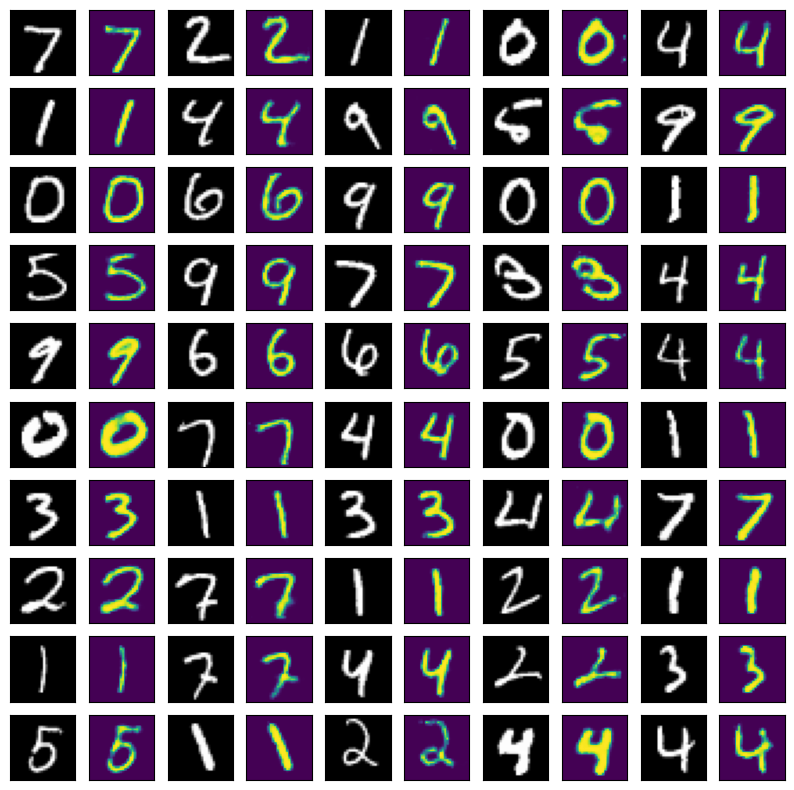

In [13]:

reconstructed_images = updated_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()


### Test the model on the new test set

In [14]:

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from matplotlib import pyplot as plt
import numpy as np

# load 5 sample images
images = []
for i in range(5):
    img_path = f'hem{i+1}.png'
    img = tf.keras.utils.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
    images.append(img)
    
# predict the images from this sample
input_arrs = []
for img in images:
    input_arr = tf.keras.utils.img_to_array(img)
    input_arr = input_arr/ 255 # normalize between 0 and 1
    input_arr = input_arr.reshape(784)
    input_arrs.append(input_arr)

input_arrs = np.array(input_arrs)
predictions = updated_model.predict(input_arrs)
print(predictions.shape)

1/1 [==============================] - 0s 92ms/step
(5, 784)


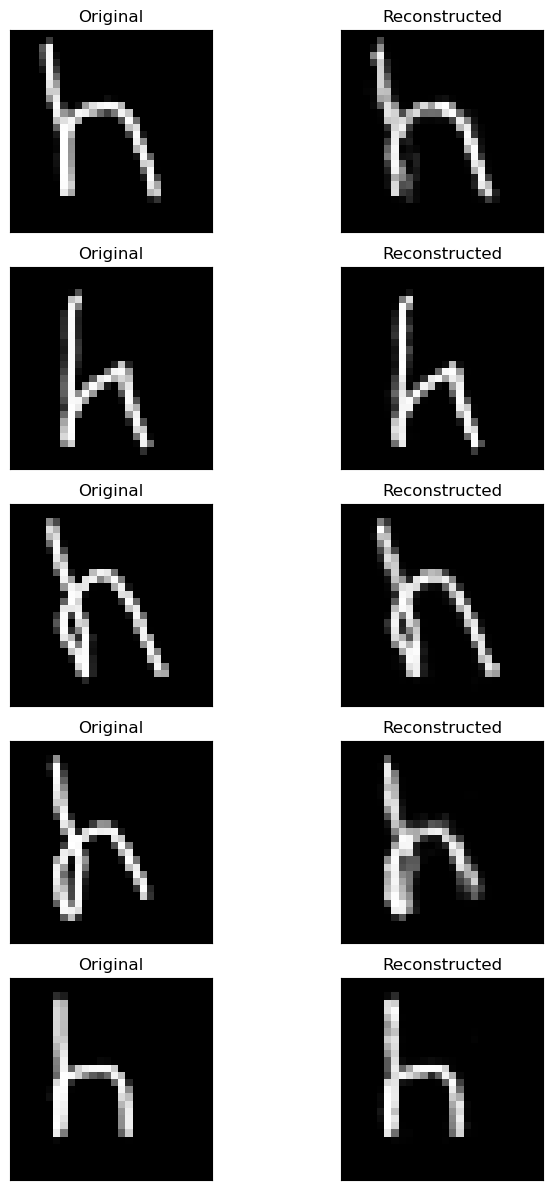

In [15]:
# display the images and their reconstructions side by side
# 
rows = 5
cols = 2
fig, axs = plt.subplots(rows,cols,figsize=(8,12))

for i in range(rows):
    axs[i,0].imshow(images[i], cmap="gray")
    axs[i,0].set_xticks([])
    axs[i,0].set_yticks([])
    axs[i,0].set_title("Original")
    
    axs[i,1].imshow(predictions[i].reshape(28,28), cmap="gray")
    axs[i,1].set_xticks([])
    axs[i,1].set_yticks([])
    axs[i,1].set_title("Reconstructed")

plt.tight_layout()
plt.show()

### Save the autoencoder for later user.

In [16]:
updated_model.save('updated_autoencoder.h5')

### Conclusion

Now we can clearlly observe that the updated trained model is predicting the 5 images close to the actual images. This is only possible after training the already existing trained model by adding the oversampled images to the existing Mnist data. That way we trained the model to predict these images. We can acheive much better prediction if we increase the oversampling count but then if we increase it the model's ability to predict the mnist data will decrease and the model will not predict the digits properly.